In [83]:
!pip install rdkit pandas scikit-learn
#we import rdkit is a library which is used for computaional chemistry which we use for conversion of smiles format into  morgan fingerprints for Machine learning algorithms

In [68]:
from rdkit import Chem #importing differebt python libraries for AI/Ml tasks including packages for computaion in chemistry
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
# we define data frame by reading csv file for diffeernt formates data like smiles and solubility in moles per litre etc

df = pd.read_csv('/content/delaney-processed.csv')
smiles_list = df['smiles'].tolist() #list of smiles from csv file
y = df['measured log solubility in mols per litre'].values #y is the column containing  differnet solubility of diferent molecules

#we define funciton to convert the smiles into morgan 512 bit fingerprints which binary vectors written in 0s and 1s for corresponding smiles
def smiles_to_morgan_fp(smiles, radius=2, nBits=512):#radius is no of bonds from central atom to take in account
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    return np.array(fp) #array of morgan fingerprints

# Build feature matrix X and filter invalid molecules
X = []
filtered_y = []

for smile, target in zip(smiles_list, y):
    fp = smiles_to_morgan_fp(smile)
    if fp is not None:
        X.append(fp)
        filtered_y.append(target)

X = np.array(X)
y = np.array(filtered_y)


[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerator
[08:59:57] DEPRECATION WARNING: please use MorganGenerat

In [69]:
print("Shape:", X.shape)
density = np.sum(X) / (X.shape[0] * X.shape[1])
print(f"Average fingerprint density (bits set): {density:.4f}")
#This means on average, only 4.11% of the fingerprint bits are set to 1, and the rest are 0 — which is expected.

#Size of the fingerprint matrix (samples × bits)

Shape: (1128, 512)
Average fingerprint density (bits set): 0.0411


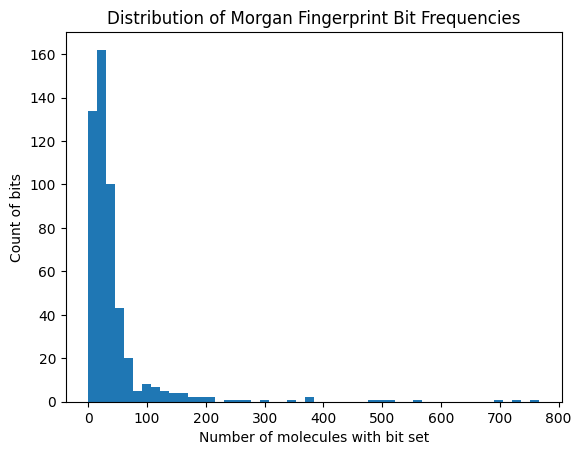

In [70]:
bit_freq = np.sum(X, axis=0)
import matplotlib.pyplot as plt

plt.hist(bit_freq, bins=50)
plt.title('Distribution of Morgan Fingerprint Bit Frequencies')
plt.xlabel('Number of molecules with bit set')
plt.ylabel('Count of bits')
plt.show()


[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerator
[09:00:10] DEPRECATION WARNING: please use MorganGenerat

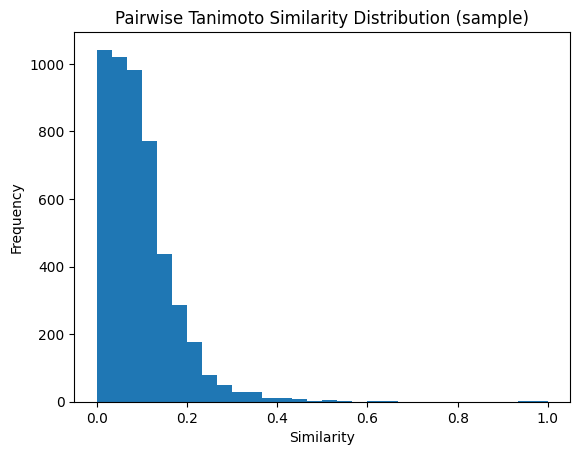

In [71]:
from rdkit.DataStructs import TanimotoSimilarity
from rdkit import DataStructs

# Calculate pairwise similarity between first 100 molecules (example)
#t is a metric used to compare binary fingerprint vectors of two molecules
sample_fps = [Chem.MolFromSmiles(s) for s in smiles_list[:100]]
fps_bitvec = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512) for mol in sample_fps]

similarities = []
for i in range(len(fps_bitvec)):
    for j in range(i+1, len(fps_bitvec)):
        sim = TanimotoSimilarity(fps_bitvec[i], fps_bitvec[j])
        similarities.append(sim)

plt.hist(similarities, bins=30)
plt.title('Pairwise Tanimoto Similarity Distribution (sample)')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()


In [72]:
from sklearn.model_selection import train_test_split #we include packages for splitting train and test dataset of molecules
from sklearn.ensemble import RandomForestRegressor #random forest model is imported here
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error#for measuring our model acccuracy and error we use different metrics

#splitting the dataset where we only use morgan fingerprints of smiles of molecules here 75% for training and rest for testing
X_train_only_smiles, X_test_only_smiles, y_train_only_smiles, y_test_only_smiles = train_test_split(X, y, test_size=0.25, random_state=42)

# we define our random forest model here which is combination of different decision trees  working in prarallel to each other  , each tree works indpendently and takes sample of data by bootdtraping each time
#in regression we get avg output of many decsion trees working in parallel
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_only_smiles, y_train_only_smiles)

# we have predicted y value i.e solbility of molecules in moles per litre for test dataset 25%of total data
y_pred_only_smiles = rf_model.predict(X_test_only_smiles)

#we hereby print metrics pf model  like coefficient of determination around which comes to be around 0.68 ..okayish accuracy is shown here not very good model we can say
#RMSE is >0.8 which again is not very good
#mean absolute error shoudl be near 0 for a goood scientif model
print("R²:", r2_score(y_test_only_smiles, y_pred_only_smiles))
print("RMSE:", np.sqrt(mean_squared_error(y_test_only_smiles, y_pred_only_smiles)))
print("MAE:", mean_absolute_error(y_test_only_smiles, y_pred_only_smiles))


R²: 0.6784217932749443
RMSE: 1.2255787397245257
MAE: 0.9323631276913182


In [74]:
from rdkit import Chem #since in last code wew saw accuracy is near 75% we must use some for features for a better accuracy
from rdkit.Chem import Descriptors, AllChem
import numpy as np
# solubility of molecule is physical property which is not just governed by structures of molecules but also properties like no. of rings, no. h bond donors, no. of roatable bonds an dpolar surface area
def mol_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
#here our function takes smiles and convert the it into 2048 bit morgan fingerprints
    # Morgan fingerprint
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    fp_array = np.array(fp)
#Descriptors are quantitative properties of molecules that provide meaningful, interpretable features for machine learning and cheminformatics.
    # RDKit descriptors used here from molecules of csv files
    descriptors = [
        Descriptors.MolWt(mol),
        Descriptors.MolLogP(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.NumRotatableBonds(mol),
        Descriptors.TPSA(mol),
        Descriptors.NumAromaticRings(mol)
    ]
    return np.concatenate((fp_array, descriptors))

# taking x as features liek smiles, and descriptors and y as solubility of molecules
X = np.array([mol_features(s) for s in smiles_list if mol_features(s) is not None])
y = df['measured log solubility in mols per litre'].values

[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerator
[09:02:24] DEPRECATION WARNING: please use MorganGenerat

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
#splitting data for models which has many features including morgan fingerprints converted form smiles

In [76]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=300, random_state=42)
RF_model.fit(X_train, y_train)
#using random forest regressor we fit the trianing data

RandomForestRegressor(n_estimators=300, random_state=42)

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# we have defined evaluate model funciton for evaluation for other basline models like xgboost, lightbm, svm
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

#printing the performance summary of each model when funciton is called
    print(f"📈 {model_name} Performance:")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")

    # Ploting  Actual vs Predicted graph fro solubility
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel("Actual logS")
    plt.ylabel("Predicted logS")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.grid(True)
    plt.show()

    # Plotting Residuals that is difference of actual and predicted solubbilities of molecules
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(0, color='r', linestyle='--')
    plt.xlabel("Residuals (Error)")
    plt.title(f"{model_name}: Distribution of Residuals")
    plt.grid(True)
    plt.show()

    return {"model": model_name, "MAE": mae, "RMSE": rmse, "R2": r2}


📈 Random Forest Performance:
MAE : 0.5314
RMSE: 0.7648
R²  : 0.8748


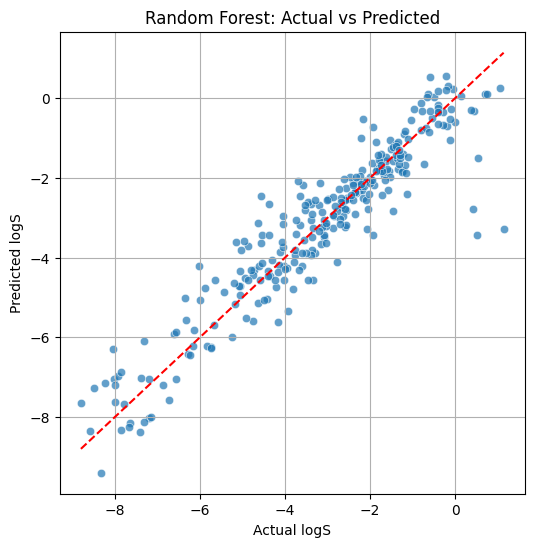

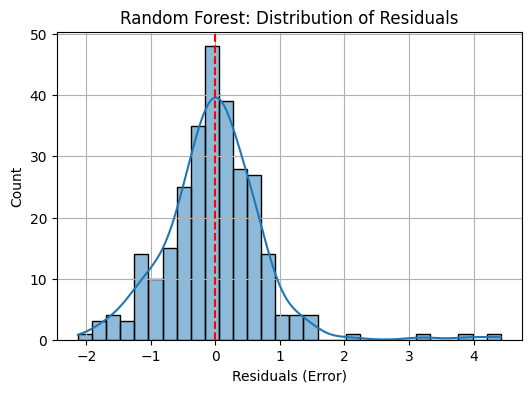

In [94]:
y_pred = RF_model.predict(X_test)
rf_metrics = evaluate_model(y_test, y_pred, "Random Forest")


#we have random forets model prediction after usign many features along with smiles where we get high R2 of 0.87

In [84]:
!pip install scikit-learn xgboost lightgbm
#including otehr baselin models

📈 SVM Performance:
MAE : 0.9001
RMSE: 1.2043
R²  : 0.6895


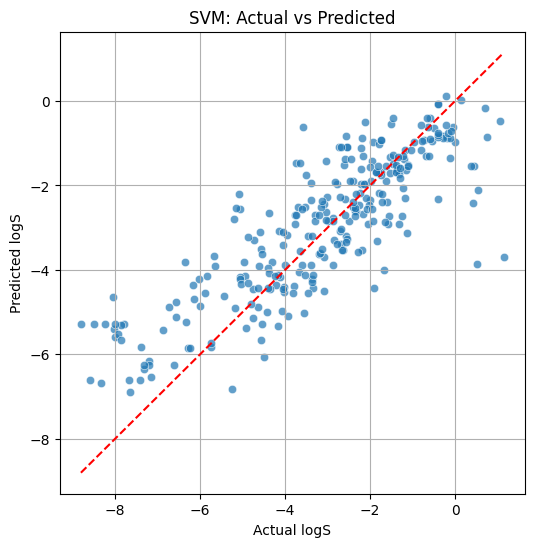

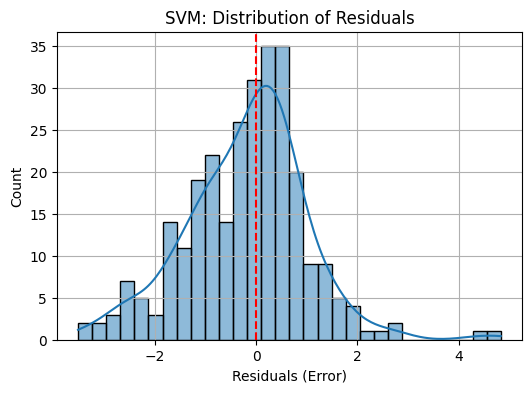

In [95]:
from sklearn.svm import SVR
#we use support vector machine that is supervised learning algorithm ..
#SVR is for regression purpose and we have used linear kenral to fit the data which oerforms comaprativly poor than other ensemble algorithms
#Radial Basis Function kernel → allows SVR to model nonlinear relationships between features and target.
#C is penalty parameter how mutakench to penalize  errors
#epsilon is set to 0.1 range in which prreciciton can lie
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can tune these
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_metrics = evaluate_model(y_test, y_pred_svm, model_name="SVM")
#we may increase the accuracy by highly tuning the model

📈 XGBoost Performance:
MAE : 0.5154
RMSE: 0.7353
R²  : 0.8842


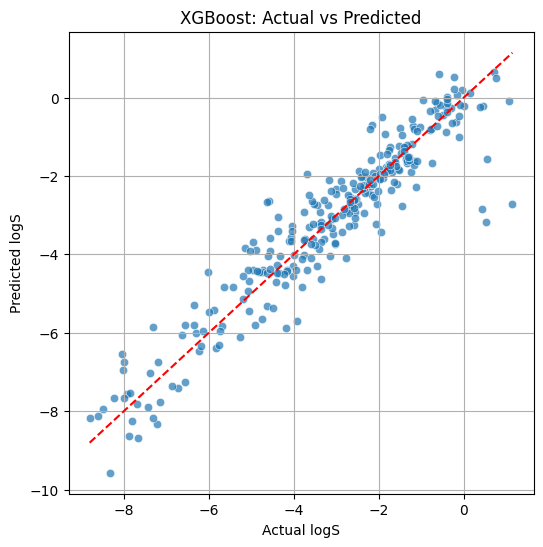

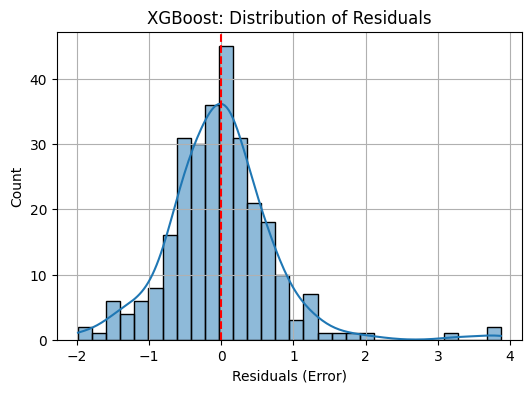

In [96]:
from xgboost import XGBRegressor
#xgboost is also ensemble model which uses many decison trees but in sequential form (extreme gradient boosting ) where weak learners like a tree leanrs and corrects its mistake in next tree
#n_estimators tells no. of trees to be used but too many can cause overfitting
#learning rate of treee is how fast decison tree learn if learning rate is small we need more trees
#depth means how deep a tree can go if we keep shallow then underfitting happens and overfitting if too much depth
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
#model R2 score is high >0.85 which shows xgboost suits well here but we have used multiple descriptors along with smiles for more accuracy
y_pred_xgb = xgb_model.predict(X_test)
xgb_metrics = evaluate_model(y_test, y_pred_xgb, model_name="XGBoost")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 163
[LightGBM] [Info] Start training from score -3.019447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

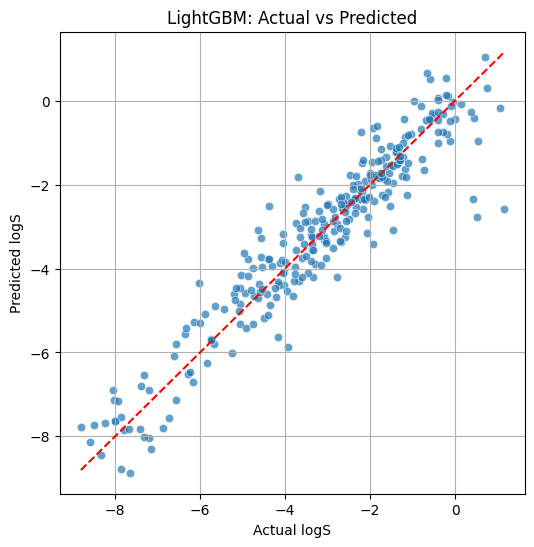

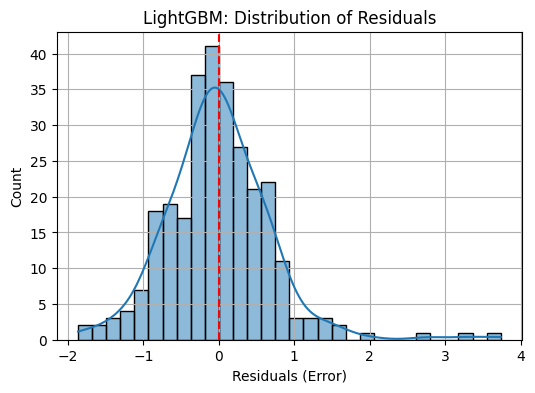

In [97]:
from lightgbm import LGBMRegressor
#lightgbm (light gradient boosting model)is faster than previous models whre the decison trees doesn grow at each level like xgboost but here it grwos leaf wise.
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgbm_model.fit(X_train, y_train)
#lightgbm is fast accurate uses less memory due to leadf wise growth and can handle large dataset features nicely ...also we dont need one hot encoding fpor cateogorical features if we used any
y_pred_lgbm = lgbm_model.predict(X_test)
lgbm_metrics = evaluate_model(y_test, y_pred_lgbm, model_name="LightGBM")


In [98]:
import pandas as pd

results_df = pd.DataFrame([svm_metrics, xgb_metrics, lgbm_metrics,rf_metrics])
print("📋 Model Comparison:\n")
print(results_df)
#If R² = 0.87 → model explains 87% of the variance in solubility.
#If MAE = 0.3, on average, predictions are 0.3 units away from actual values.

📋 Model Comparison:

           model       MAE      RMSE        R2
0            SVM  0.900062  1.204336  0.689473
1        XGBoost  0.515391  0.735324  0.884239
2       LightGBM  0.502541  0.698556  0.895526
3  Random Forest  0.531390  0.764825  0.874764


Descriptors These are numerical values computed from molecular structure, often using chemistry libraries like RDKit.
Molecular weight (MolWt)

Number of hydrogen bond donors (NumHDonors)

LogP (lipophilicity)

Topological polar surface area (TPSA)

Number of rotatable bonds

In [1]:
%pip install torch torchvision torchaudio
%pip install torch-geometric rdkit pandas scikit-learn
#torch: This is the core PyTorch library, providing fundamental data structures (like tensors) and operations for building neural networks.
#torch-geometric: This is a library built on top of PyTorch specifically for implementing and working with Graph Neural Networks (GNNs).
#rdkit: As seen earlier in the notebook, rdkit is a cheminformatics toolkit used for working with chemical structures,

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [3]:
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split

# csv data read and stored as dataframe
df = pd.read_csv("/content/delaney-processed.csv")  # replace with your file
df = df.dropna()
#smiles is stoes in the list
#measured solubility us stored as well
smiles_list = df['smiles']
solubility = df['measured log solubility in mols per litre']  # change this to your target column name


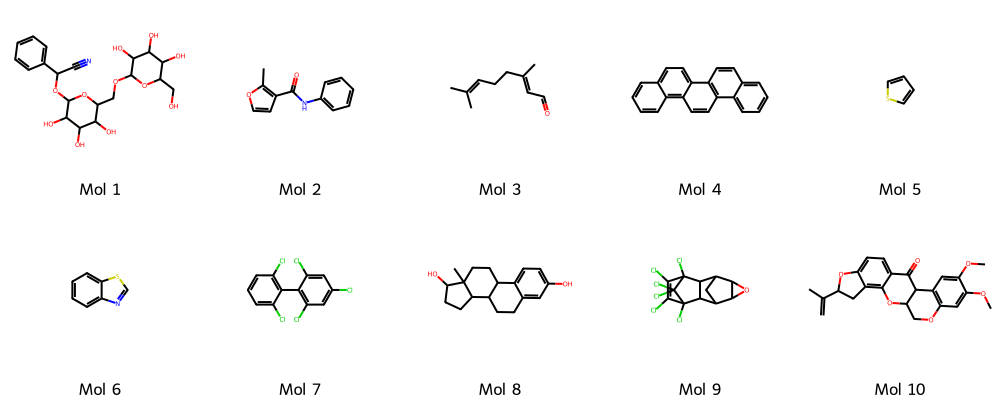

In [12]:
from rdkit.Chem import Draw

#for vislaization of molecules in 2d form we use Draw package for top 10 molecules which we can see here
smiles_list = df['smiles'].head(10)

# Convert SMILES to RDKit Mol objects
mol_list = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Drawing  molecules in grid of top 10 molecules(2 rows of 5)
img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200, 200), legends=[f"Mol {i+1}" for i in range(10)])
img

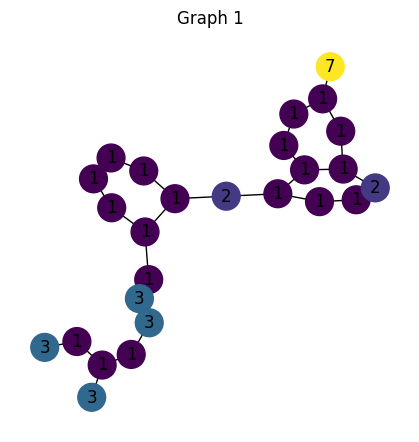

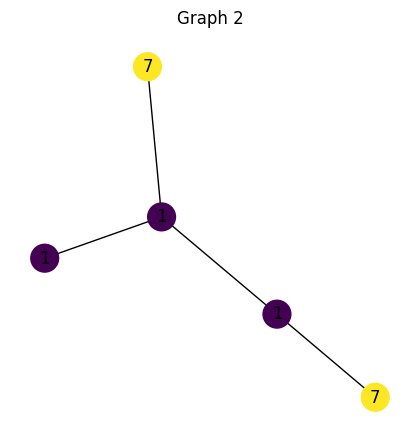

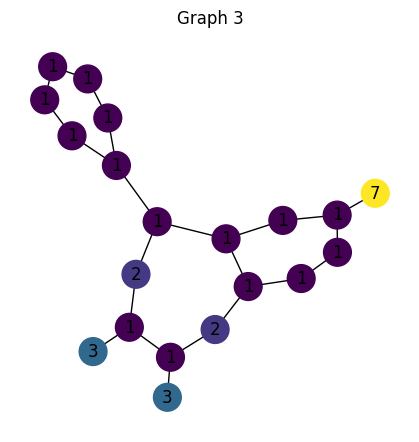

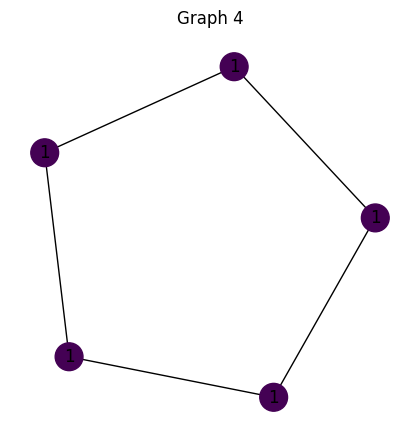

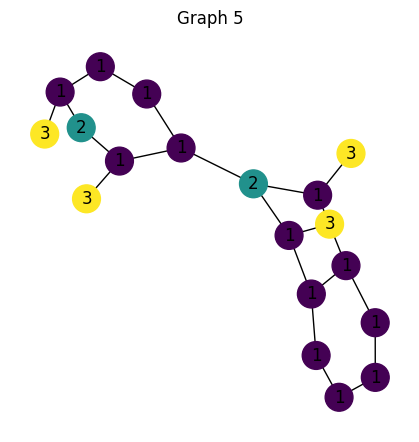

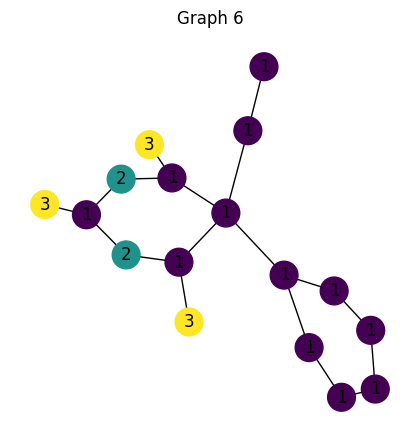

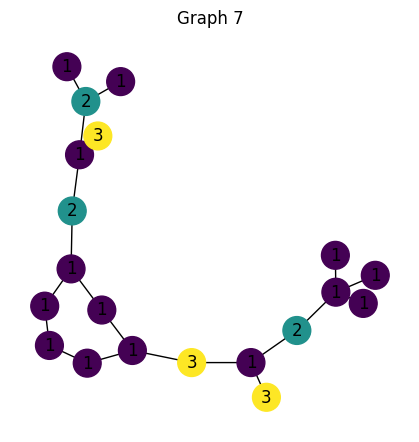

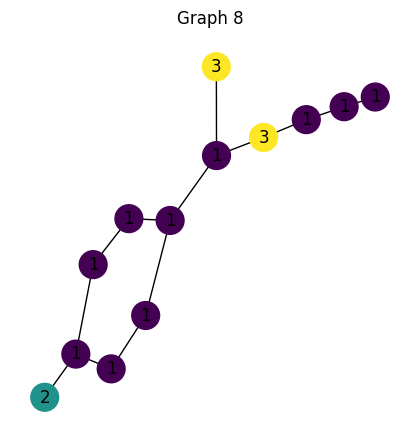

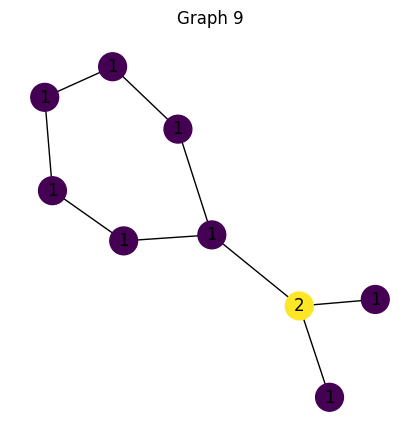

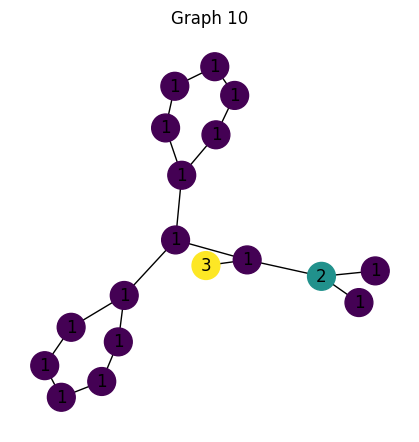

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
#in this photo we can visalise the molecules as node and edge graph where each atom is node and bonds are edges
# Visualize first 10 molecular graphs
for i in range(10):
    graph = train_graphs[i]  # PyG Data object
    G = to_networkx(graph, to_undirected=True)
#graph = train_graphs[i] selects the i-th graph object, which is in the torch_geometric.data.Data format.



    # Node feature = atomic number (if one-hot, take argmax)
    if graph.x.size(1) > 1:
        node_labels = graph.x.argmax(dim=1).numpy()
    else:
        node_labels = graph.x.squeeze().int().numpy()

    plt.figure(figsize=(4, 4))
    nx.draw(G,
            with_labels=True,
            labels={j: str(node_labels[j]) for j in G.nodes},
            node_color=node_labels,
            cmap='viridis',
            node_size=400)
    plt.title(f"Graph {i+1}")
    plt.show()


In [4]:
from torch_geometric.data import InMemoryDataset
from torch_geometric.utils import dense_to_sparse
import torch.nn.functional as F

atom_features = {
    'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4, 'P': 5, 'S': 6, 'Cl': 7, 'Br': 8, 'I': 9
}

def atom_to_feature(atom):
    symbol = atom.GetSymbol()
    return [atom_features.get(symbol, 10)]  # fallback for uncommon atoms

def mol_to_graph(smiles, label):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None: return None

    # Atom features
    x = torch.tensor([atom_to_feature(atom) for atom in mol.GetAtoms()], dtype=torch.float)

    # Edges
    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index.append((i, j))
        edge_index.append((j, i))  # undirected

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    y = torch.tensor([label], dtype=torch.float)

    return Data(x=x, edge_index=edge_index, y=y)


In [5]:
graph_list = []

for smi, sol in zip(smiles_list, solubility):
    g = mol_to_graph(smi, sol)
    if g is not None:
        graph_list.append(g)

# Train/test split
train_graphs, test_graphs = train_test_split(graph_list, test_size=0.25, random_state=42)


In [6]:
import torch.nn as nn
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels=64):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = global_mean_pool(x, batch)  # pooling over graph
        x = self.lin(x)

        return x.squeeze()


In [7]:
from torch_geometric.loader import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32)

model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Training loop
for epoch in range(1, 31):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch:02d}, Loss: {total_loss:.4f}')


Epoch 01, Loss: 263.4729
Epoch 02, Loss: 167.9065
Epoch 03, Loss: 140.1364
Epoch 04, Loss: 138.9954
Epoch 05, Loss: 135.7400
Epoch 06, Loss: 134.4230
Epoch 07, Loss: 134.9109
Epoch 08, Loss: 132.7272
Epoch 09, Loss: 129.1386
Epoch 10, Loss: 128.4358
Epoch 11, Loss: 128.6862
Epoch 12, Loss: 126.5624
Epoch 13, Loss: 124.9953
Epoch 14, Loss: 123.8376
Epoch 15, Loss: 125.8180
Epoch 16, Loss: 120.6016
Epoch 17, Loss: 121.1687
Epoch 18, Loss: 120.7953
Epoch 19, Loss: 121.1709
Epoch 20, Loss: 118.1151
Epoch 21, Loss: 118.1975
Epoch 22, Loss: 117.2215
Epoch 23, Loss: 117.3051
Epoch 24, Loss: 116.9088
Epoch 25, Loss: 116.7288
Epoch 26, Loss: 117.7385
Epoch 27, Loss: 115.8769
Epoch 28, Loss: 115.5850
Epoch 29, Loss: 116.0227
Epoch 30, Loss: 115.3095


In [8]:
model.eval()
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch).cpu().numpy()
        y = batch.y.cpu().numpy()
        y_true.extend(y)
        y_pred.extend(out)

# Metrics
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("📊 GNN (PyTorch Geometric) Results:")
print(f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")


📊 GNN (PyTorch Geometric) Results:
R²: -0.008, RMSE: 2.170, MAE: 1.709
